In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df1 = pd.read_csv('data\clustered_data.csv')
pd.set_option('display.max_columns',None)  # for displaying all columns
df1.head(10)

,Education,Marital_Status_Together,Marital_Status_Single,Marital_Status_Divorced,Marital_Status_Widow,Marital_Status_Others,Age,Income,Children,Customer_Tenure,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Discount_Purchase,Web_Purchase,Catalog,Store_Purchase,Website_Visit,Complain,Total_Promo,Total_Spending,Cluster
0,2,0,1,0,0,0,68,58138.0,0,36,58,635.0,81,546,120.5,81,88.0,3,8,10,4,7,0,0,1617.0,1
1,2,0,1,0,0,0,71,46344.0,2,586,38,11.0,1,6,2.0,1,6.0,2,1,1,2,5,0,0,27.0,0
2,2,1,0,0,0,0,60,71613.0,0,387,26,426.0,49,127,111.0,21,42.0,1,8,2,10,4,0,0,776.0,1
3,2,1,0,0,0,0,41,26646.0,1,560,26,11.0,4,20,10.0,3,5.0,2,2,0,4,6,0,0,53.0,0
4,4,0,0,0,0,0,44,58293.0,1,538,94,173.0,43,118,46.0,27,15.0,5,5,3,6,5,0,0,422.0,2
5,3,1,0,0,0,0,58,62513.0,1,406,16,520.0,42,98,0.0,42,14.0,2,6,4,10,6,0,0,716.0,2
6,2,0,0,1,0,0,54,55635.0,1,106,34,235.0,65,164,50.0,49,27.0,4,7,3,7,6,0,0,590.0,2
7,4,0,0,0,0,0,40,33454.0,1,282,32,76.0,10,56,3.0,1,23.0,2,4,0,4,8,0,0,169.0,0
8,4,1,0,0,0,0,51,30351.0,1,311,19,14.0,0,24,3.0,3,2.0,1,3,0,2,9,0,0,46.0,0
9,4,1,0,0,0,0,75,5648.0,2,591,68,28.0,0,6,1.0,1,13.0,1,1,0,0,20,0,1,49.0,0


In [20]:
df1.shape

(2239, 26)

In [21]:
# splitting data into x and y

x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, precision_score, f1_score, recall_score, roc_auc_score, roc_curve

In [31]:
models = {
          
    'Random Forest': RandomForestClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Ada-Boost classifier' : AdaBoostClassifier(),
    'Support vector classifier' : SVC(),
    'K-neighbor classifier' : KNeighborsClassifier(),
    'XGB classifier' : XGBClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'cat-Boost classifier' : CatBoostClassifier(verbose=False)
}

In [32]:
def evaluate_models(x, y, model):

    x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
    
    model_list=[]
    scores=[]

    for model_name , model in models.items():

        model =  model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)

        print(f"---- Score for ---- {model_name} ----")
        print(f"==>> {score*100:.2f} %")
        
        model_list.append(model_name)
        scores.append(score)

    report = pd.DataFrame()
    report['Model_Name'] = model_list      
    report['Scores'] = scores 
    return report

In [33]:
report = evaluate_models(x,y,models)

---- Score for ---- Random Forest ----
==>> 95.71 %
---- Score for ---- DecisionTreeClassifier ----
==>> 91.43 %
---- Score for ---- Gradient Boosting ----
==>> 95.71 %
---- Score for ---- Ada-Boost classifier ----
==>> 93.39 %
---- Score for ---- Support vector classifier ----
==>> 78.39 %
---- Score for ---- K-neighbor classifier ----
==>> 85.71 %
---- Score for ---- XGB classifier ----
==>> 96.79 %
---- Score for ---- Logistic Regression ----
==>> 88.75 %
---- Score for ---- cat-Boost classifier ----
==>> 97.14 %


In [34]:
report.sort_values('Scores',ascending=False)

,Model_Name,Scores
8,cat-Boost classifier,0.971429
6,XGB classifier,0.967857
0,Random Forest,0.957143
2,Gradient Boosting,0.957143
3,Ada-Boost classifier,0.933929
1,DecisionTreeClassifier,0.914286
7,Logistic Regression,0.887500
5,K-neighbor classifier,0.857143
4,Support vector classifier,0.783929


# cat-Boost perform very well with almost 97%
# we will go with the second highest XG boost classifier, it gaves almost 96% of accuracy and it`s Popular enough to go with this.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [36]:
x_train.shape, x_test.shape

((1567, 25), (672, 25))

In [38]:
from sklearn.model_selection import GridSearchCV


param_grid = {

    'n_estimators' : [50, 100, 150],
    'max_depth' : [3, 5, 7],
    'learning_rate' : [0.01, 0.1 , 0.2],
    'subsample' : [0.8, 1.0],
    'colsample_bytree' : [0.8, 1.0],
    'gamma' : [0, 1],
    'reg_alpha' : [0, 0.1],
    'reg_lambda' : [1, 10],
    'min_child_weight' : [1, 3, 5],
    'eval_metric' : ['mlogloss']
    
}

In [39]:
xgb_classifier = XGBClassifier()

In [41]:
xgb_classifier_cv = GridSearchCV(xgb_classifier, param_grid ,cv=6, verbose=2)
xgb_classifier_cv.fit(x_train, y_train)

Fitting 6 folds for each of 2592 candidates, totalling 15552 fits
[CV] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, eval_metric=mlogloss, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50, reg_alpha=0, reg_lambda=1, sub

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'eval_metric': ['mlogloss'], 'gamma': [0, 1], 'learning_rate': [0.01, 0.1, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,6
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


In [42]:
xgb_classifier_cv.best_estimator_

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [43]:
xgb_classifier_cv.best_score_

np.float64(0.9674475739229623)

In [44]:
best_model = XGBClassifier(n_estimators=150,max_depth=3, min_child_weight=1, colsample_bytree=0.8,enable_categorical=False,  reg_alpha=0, reg_lambda=1, subsample=0.8, learning_rate=0.2, eval_metric='mlogloss', objective='multi:softprob') 

In [ ]:
best_model_fitted = best_model.fit(x_train, y_train)

In [46]:
y_pred = best_model_fitted.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("--- XGB-Classifier ---")
print(f" Accuracy : {score*100:.2f} %")
print(f"\n Classification-report : {cr}")

--- XGB-Classifier ---
 Accuracy : 97.47 %

 Classification-report :               precision    recall  f1-score   support

           0       0.98      0.99      0.99       284
           1       0.98      0.97      0.98       213
           2       0.95      0.95      0.95       175

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



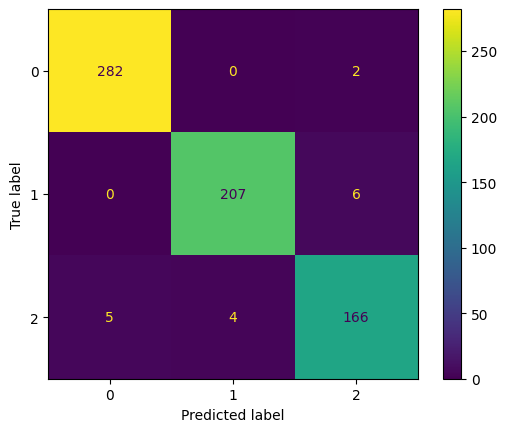

In [47]:
ConfusionMatrixDisplay.from_estimator(best_model_fitted, x_test, y_test)

# Reports:

XGBoost-Classifier performs very well.
It gives almost 98% accuracy which is very fantastic!!

In [ ]:
# Saving the best Estimator for future

import joblib
joblib.dump(xgb_classifier_cv.best_estimator_, 'best_model.pkl', compress=3)


['best_model.pkl']